In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('..')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from agots.multivariate_generators.multivariate_data_generator import MultivariateDataGenerator

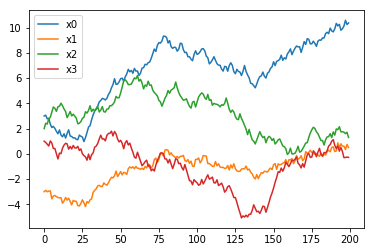

,x0,x1,x2,x3
x0,1.000000,0.985941,-0.144821,-0.186724
x1,0.985941,1.000000,-0.129324,-0.187107
x2,-0.144821,-0.129324,1.000000,0.197286
x3,-0.186724,-0.187107,0.197286,1.000000


In [4]:
np.random.seed(1337)

STREAM_LENGTH = 200
N = 4
K = 2

dg = MultivariateDataGenerator(STREAM_LENGTH, N, K)
df = dg.generate_baseline(initial_value_min=-4, initial_value_max=4)

for col in df.columns:
    plt.plot(df[col], label=col)
plt.legend()
plt.show()

df.corr()

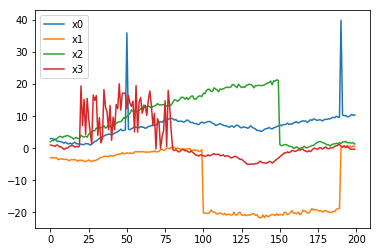

,x0,x1,x2,x3
0,3.000000,-3.000000,2.000000,1.000000
1,3.060530,-2.887943,2.419412,0.908175
2,2.773117,-3.003151,2.359755,0.756587
3,2.816198,-2.953174,2.774531,0.618809
4,2.350169,-2.929736,2.893389,1.019772
5,2.085558,-3.566645,3.299516,0.859867
6,2.177671,-3.340701,3.712991,0.423561
7,2.012698,-3.302543,3.611960,0.424597
8,1.783180,-3.384022,3.363775,0.011063
9,1.590633,-3.465373,3.730589,-0.406819


In [5]:
df = dg.add_outliers({'extreme': [{'n': 0, 'timestamps': [(50,), (190,)],
                                   'value': 30
                                  }],
                      'shift':   [{'n': 1, 'timestamps': [(100, 190)],
                                   'shift_value': -20  # or 'value' (for a plain addition)
                                  }],
                      'trend':   [{'n': 2, 'timestamps': [(20, 150)],
                                   'trend_value': 0.15
                                  }],
                      'variance':[{'n': 3, 'timestamps': [(20, 80)],
                                   'variance_factor': 19
                                  }]})

for col in df.columns:
    plt.plot(df[col], label=col)
plt.legend()
plt.show()
df